# Задание 2

Mean (Yellow) = 29.69911764705882
 
Variance = 211.01912474630802
 
Median (Blue) = 28.0
 
Mode (Green) = 24.0
 


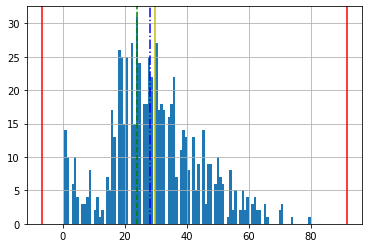

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Считывание данных
titanic_data = pd.read_csv('train.csv')
ages = titanic_data.Age

# Подсчет параметров и их вывод
param = []
param.append(ages.mean())
param.append(ages.var())
param.append(ages.median())
param.append(ages.mode()[0])

param_names = [ 'Mean (Yellow)', 'Variance', 'Median (Blue)', 'Mode (Green)' ]

for i in range(len(param)):
    print(param_names[i] + ' =', param[i], end='\n \n')

# Проверка на выбросы
Q3 = ages.quantile(0.75)
Q1 = ages.quantile(0.25)
IQR = Q3 - Q1
interval = [Q1 - 1.5 * IQR, Q3 + 3 * IQR]

# Отрисовка гистограммы, параметров и диапазона проверки на выбросы
ages.hist(bins=100)
# plt.axhline(y=0.5, color='r', linestyle='-')

plt.axvline(x=param[0], color='y', linestyle='-')
plt.axvline(x=param[2], color='b', linestyle='-.')
plt.axvline(x=param[3], color='g', linestyle='--')
plt.axvline(x=interval[0], color='r', linestyle='-')
plt.axvline(x=interval[1], color='r', linestyle='-')
plt.show()

In [327]:
sigma = ages.var()
((((ages - ages.mean()) ** 3).sum()) / ages.shape[0]) / sigma ** 3

0.00010129331830440588

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

v = np.random.sample(10000)
v = np.random.normal(1,size=1000)
param = []


param.append(v.mean())
param.append(v.var())
param.append(np.median(v))

v_df = pd.DataFrame(v)

param.append(v_df.round(2).mode()[0][0])


param_names = [ 'Mean', 'Variance', 'Median', 'Mode' ]

for i in range(len(param)):
    print(param_names[i] + ' =', param[i], end='\n \n')

v_df.hist(bins=100)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B222939AC8>]],
      dtype=object)

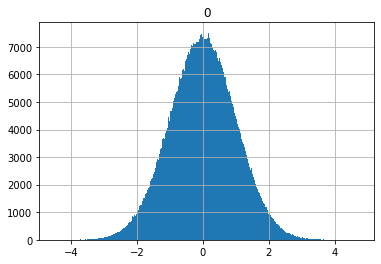

In [324]:
v = np.random.sample(10000)
v = np.random.normal(0,size=1000000)
v_df = pd.DataFrame(v)
v_df.hist(bins=500)

In [325]:
sigma = v_df.var()
((((v_df - v_df.mean()) ** 3).sum()) / v_df.shape[0]) / sigma ** 3

0   -0.004714
dtype: float64

# Задание 2а

In [55]:
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline

In [298]:
def func(k):
    r1 = np.random.randint(1,7,k)
    r2 = np.random.randint(1,7,k)
    
    unique, counts1 = np.unique(r1, return_counts=True)
    unique, counts2 = np.unique(r2, return_counts=True)
    
    dice = np.array([counts1, counts2])
    
    print(stats.chi2_contingency(dice), '\n')
    
for k in [35, 50, 500]:
    func(k)

(3.8451770451770457, 0.571915184922871, 5, array([[4.5, 6.5, 5. , 7. , 7. , 5. ],
       [4.5, 6.5, 5. , 7. , 7. , 5. ]])) 

(7.692731829573935, 0.17400261475143028, 5, array([[10.5,  7. ,  5. , 10. ,  9.5,  8. ],
       [10.5,  7. ,  5. , 10. ,  9.5,  8. ]])) 

(7.3532010973533755, 0.1956693429092905, 5, array([[90. , 83. , 92. , 86.5, 74.5, 74. ],
       [90. , 83. , 92. , 86.5, 74.5, 74. ]])) 



In [311]:
k = 500

r1 = np.random.randint(1,7,k)
r2 = np.random.randint(1,7,k)
    
unique, counts1 = np.unique(r1, return_counts=True)
unique, counts2 = np.unique(r2, return_counts=True)
    
dice = np.array([counts1, counts2])
    
stats.chi2_contingency(dice)

(5.989701196894603,
 0.30722232716592784,
 5,
 array([[857.5, 833.5, 805.5, 827.5, 838.5, 837.5],
        [857.5, 833.5, 805.5, 827.5, 838.5, 837.5]]))

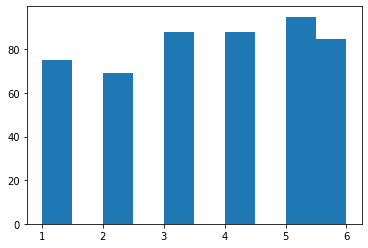

In [235]:
plt.hist(r1)
plt.show()

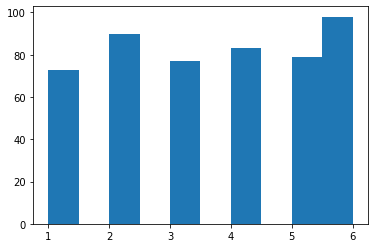

In [236]:
plt.hist(r2)
plt.show()

# Задание 3

In [279]:
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [280]:
titanic_data.Age.isnull().sum()

177

In [281]:
# titanic_data = titanic_data.fillna({'Age' : titanic_data.Age.median()})

In [282]:
titanic_data = titanic_data[titanic_data.Age.isnull() == False]

In [303]:
X = titanic_data.Age

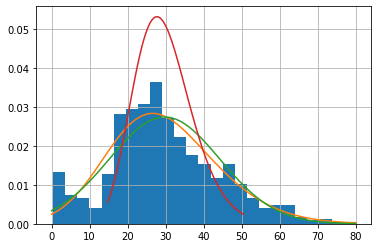

In [323]:
import math as math
X.hist(density=True, bins=25)
plt.plot(range(81),y_skew_pdf)
plt.plot(range(81),y_pdf)
plt.plot(x, stats.chi2.pdf(x, df))
plt.show()

In [314]:
mean=np.mean(X)
var=np.var(X)
std=np.sqrt(var)

In [272]:
y_skew_pdf*1000

NameError: name 'y_skew_pdf' is not defined

In [315]:
import scipy.stats as stats
y_skew_pdf = stats.skewnorm.pdf(range(81),*stats.skewnorm.fit(X))
y_pdf = stats.norm.pdf(range(81),mean,std)

(array([  4.,   9.,  13.,  35.,  35.,  81., 102.,  92., 116., 119.,  92.,
         77.,  71.,  57.,  36.,  26.,  15.,   8.,   2.,   2.,   2.,   1.,
          4.,   0.,   1.]),
 array([10.03244165, 12.16659528, 14.3007489 , 16.43490252, 18.56905615,
        20.70320977, 22.8373634 , 24.97151702, 27.10567065, 29.23982427,
        31.3739779 , 33.50813152, 35.64228515, 37.77643877, 39.9105924 ,
        42.04474602, 44.17889965, 46.31305327, 48.4472069 , 50.58136052,
        52.71551415, 54.84966777, 56.98382139, 59.11797502, 61.25212864,
        63.38628227]),
 <a list of 25 Patch objects>)

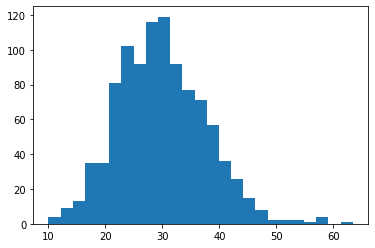

In [318]:
r = stats.chi2.rvs(mean, size=1000)
plt.hist(r, bins=25)

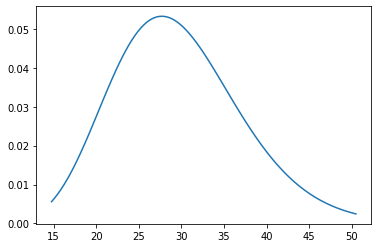

In [320]:
df = mean
x = np.linspace(stats.chi2.ppf(0.01, df),
                stats.chi2.ppf(0.99, df), 100)
plt.plot(x, stats.chi2.pdf(x, df))

In [321]:
unique, counts1 = np.unique(r, return_counts=True)
unique, counts2 = np.unique(X, return_counts=True)

In [322]:
dice = np.array([counts1, counts2])
stats.chi2_contingency(dice)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()